<a href="https://colab.research.google.com/github/SuhelAnsari9272/Topic-Modeling-on-News-Articles-/blob/main/Suhel_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [20]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import re
from nltk.tokenize import RegexpTokenizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
#mouting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path="/content/drive/MyDrive/bbc"
folders=["business","entertainment","politics","sport","tech"] 

In [10]:
folder_list=os.listdir(path)
folder_list

['README.TXT', 'tech', 'sport', 'entertainment', 'business', 'politics']

In [11]:
#loading the data
News=[]
Type=[]

folder_data="/content/drive/MyDrive/bbc"
folders=["business","entertainment","politics","sport","tech"] 
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,'rb') as f:
            data=f.read()
        News.append(data)
        Type.append(i)
      

In [12]:
data={'news':News,'type':Type}
df = pd.DataFrame(data)
df.to_csv('./bbc.csv')

In [39]:
df= pd.read_csv('bbc.csv')

In [40]:
df.head()

,Unnamed: 0,news,type
0,0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business
1,1,b'Call centre users \'lose patience\'\n\nCusto...,business
2,2,b'China keeps tight rein on credit\n\nChina\'s...,business
3,3,b'US trade gap hits record in 2004\n\nThe gap ...,business
4,4,b'India\'s rupee hits five-year high\n\nIndia\...,business


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   type        2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [42]:
df.shape

(2225, 3)

In [43]:
#first observation 
df['news'][0]

'b"Peugeot deal boosts Mitsubishi\\n\\nStruggling Japanese car maker Mitsubishi Motors has struck a deal to supply French car maker Peugeot with 30,000 sports utility vehicles (SUV).\\n\\nThe two firms signed a Memorandum of Understanding, and say they expect to seal a final agreement by Spring 2005. The alliance comes as a badly-needed boost for loss-making Mitsubishi, after several profit warnings and poor sales. The SUVs will be built in Japan using Peugeot\'s diesel engines and sold mainly in the European market. Falling sales have left Mitsubishi Motors with underused capacity, and the production deal with Peugeot gives it a chance to utilise some of it.\\n\\nIn January, Mitsubishi Motors issued its third profits warning in nine months, and cut its sales forecasts for the year to March 2005. Its sales have slid 41% in the past year, catalysed by the revelation that the company had systematically been hiding records of faults and then secretly repairing vehicles. As a result, the J

In [44]:
#length of the news
df['length']=df.news.str.len()


In [24]:
#function to return number of words in news article
def wcount(article):

  # split the documents with different delimiter
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")
  
  # count the words
  count= len(tokenizer.tokenize(article))


  return count

In [46]:
df['word_count']=df['news'].apply(wcount)

In [47]:
df.head()

,Unnamed: 0,news,type,length,word_count
0,0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business,1846,334
1,1,b'Call centre users \'lose patience\'\n\nCusto...,business,3882,730
2,2,b'China keeps tight rein on credit\n\nChina\'s...,business,1404,278
3,3,b'US trade gap hits record in 2004\n\nThe gap ...,business,1984,372
4,4,b'India\'s rupee hits five-year high\n\nIndia\...,business,1023,200


In [48]:
df.describe()

,Unnamed: 0,length,word_count
count,2225.000000,2225.000000,2225.000000
mean,1112.000000,2288.632809,426.946067
std,642.446496,1375.957963,262.611213
min,0.000000,512.000000,95.000000
25%,556.000000,1465.000000,273.000000
50%,1112.000000,1991.000000,369.000000
75%,1668.000000,2829.000000,523.000000
max,2224.000000,25670.000000,4888.000000


In [49]:
#removing duplicates observations
df=df.drop_duplicates()

In [37]:
#Types of news in the data
df['type'].value_counts(normalize=True)*100

sport            22.966292
business         22.921348
politics         18.741573
tech             18.022472
entertainment    17.348315
Name: type, dtype: float64

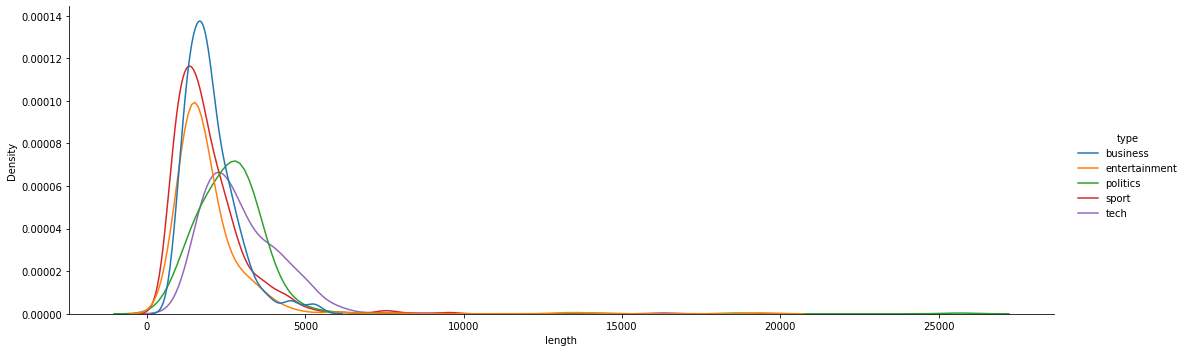

In [79]:
#distribution of length of different news type
sns.displot(df, x="length", hue="type", kind="kde",height=5,aspect =3 )

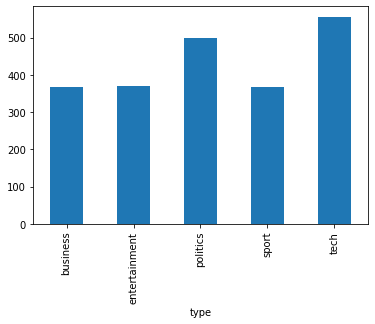

In [85]:
#wordcount of different news type
type_wc=df.groupby('type')['word_count'].mean()
type_wc.plot(kind='bar')

In [22]:
name='Md Suhel Ansari'
c=name.split(' ')
print(len(c))

3


TypeError: ignored

In [28]:
type(df['news'][2])

bytes

In [26]:
df.head()

,news,type
0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business
1,b'Call centre users \'lose patience\'\n\nCusto...,business
2,b'China keeps tight rein on credit\n\nChina\'s...,business
3,b'US trade gap hits record in 2004\n\nThe gap ...,business
4,b'India\'s rupee hits five-year high\n\nIndia\...,business


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
